### Neural Network를 이용한 종가 상승/하락 예측 분류 문제
    Input에 시,고,저,종 추가를 통한 NN 분석
    


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv,Series, DataFrame
import math
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas.io.data as web
import datetime
import tensorflow as tf
from sklearn import svm, preprocessing
import matplotlib.pyplot as plt
import math
from keras.layers.normalization import BatchNormalization
%matplotlib inline
np.set_printoptions(threshold=np.inf)



Using TensorFlow backend.
C:\Program Files\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [3]:
class KOSPIDATA:

    def __init__(self):
        start = datetime.datetime(1998, 5, 1)
        end = datetime.datetime(2016, 12, 31)
        kospi = web.DataReader("^KS11", "yahoo", start, end)

        self.arr_date= np.array(kospi.index)
        self.arr_open = np.array(kospi['Open'], dtype=float)
        self.arr_close= np.array(kospi['Adj Close'], dtype=float)
        self.arr_high= np.array(kospi.High, dtype=float)
        self.arr_low= np.array(kospi.Low, dtype=float)
        self.arr_volume= np.array(kospi.Volume, dtype=float)

def create_dataset(dataset, look_back=3):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        
        if dataset[i+look_back] > dataset[i+look_back-1]:    
            dataY.append(1)
        elif dataset[i+look_back] <= dataset[i+look_back-1]:    
            dataY.append(0)

    return np.array(dataX), np.array(dataY) 

In [5]:
K = KOSPIDATA()

# FEATURES = ['high', 'low', 'open', 'close', 'volume']
FEATURES = ['high', 'low', 'open', 'close']

data = {'year': K.arr_date,
        'open': K.arr_open,
        'high': K.arr_high,
        'low': K.arr_low,
        'close': K.arr_close}

df = DataFrame(data, columns=['year', 'high', 'low', 'open', 'close'])
# df = DataFrame(data, columns=['year','close'])

In [35]:
dataset = np.array(df[FEATURES].values[:-2,:])

In [37]:
dataset.shape

(4616, 4)

In [26]:
def prediction():
    profit = []
    for i in range(len(df['close']) - 1):
        if df['close'][i] < df['close'][i + 1]:
            profit.append(1)
        else:
            profit.append(0)
    profit = np.append(profit, np.NaN)
    return profit

In [47]:
dataY = np.array(prediction())[:-2]

In [48]:
dataY.shape

(4616,)

In [49]:
np.random.seed(7)

In [50]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataX = scaler.fit_transform(dataset)

In [ ]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX.shape, trainY.shape

In [51]:
dataX.shape

(4616, 4)

In [52]:
dataY.shape

(4616,)

In [62]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
    
sgd = optimizers.SGD(lr=0.1)


model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
history = model.fit(dataX, dataY,  validation_split=0.33, nb_epoch=200, batch_size=10)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                50        
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_10 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 147.0
Trainable params: 147.0
Non-trainable params: 0.0
_________________________________________________________________
None


C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3092 samples, validate on 1524 samples
Epoch 1/200
3092/3092 [==============================] - 0s - loss: 0.6965 - acc: 0.5265 - val_loss: 0.6946 - val_acc: 0.4928
Epoch 2/200
3092/3092 [==============================] - 0s - loss: 0.6925 - acc: 0.5213 - val_loss: 0.6931 - val_acc: 0.5072
Epoch 3/200
3092/3092 [==============================] - 0s - loss: 0.6923 - acc: 0.5304 - val_loss: 0.7079 - val_acc: 0.5072
Epoch 4/200
3092/3092 [==============================] - 0s - loss: 0.6942 - acc: 0.5236 - val_loss: 0.7021 - val_acc: 0.5072
Epoch 5/200
3092/3092 [==============================] - 0s - loss: 0.6953 - acc: 0.5146 - val_loss: 0.6953 - val_acc: 0.5072
Epoch 6/200
3092/3092 [==============================] - 0s - loss: 0.6939 - acc: 0.5207 - val_loss: 0.7236 - val_acc: 0.5072
Epoch 7/200
3092/3092 [==============================] - 0s - loss: 0.6950 - acc: 0.5304 - val_loss: 0.6934 - val_acc: 0.5072
Epoch 8/200
3092/3092 [==============================] - 0s - loss: 0.

dict_keys(['val_acc', 'val_loss', 'acc', 'loss'])


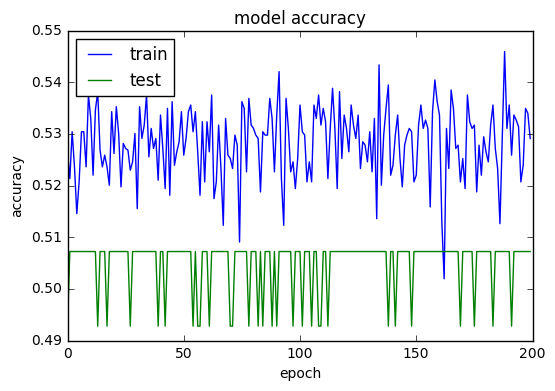

In [63]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

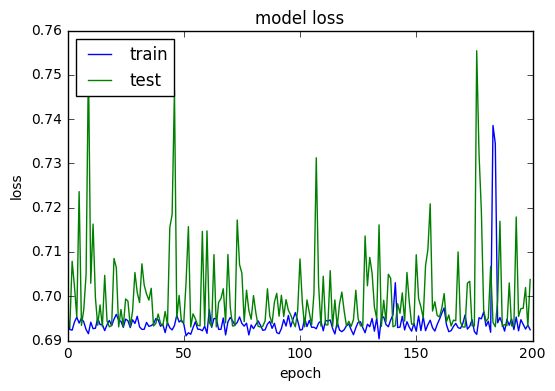

In [64]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
# test 셋을 별도로 안만들어서 에러뜸, 위에서 기본 데이터셋 train,test 분리하면 결과 스코어 확인할 수 있음
scores = model.evaluate(testX, testY, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

NameError: name 'testX' is not defined